#### Land use data exploration

In [1]:
%%bash
echo "2005"
ls LandUse/2005
echo "2017"
ls LandUse/2017

2005
2005_Final_Final.tfw
2005_Final_Final.tif
2005_Final_Final.tif.aux.xml
2005_Final_Final.tif.ovr
2005_Final_Final.tif.vat.cpg
2005_Final_Final.tif.vat.dbf
2005_Final_Final.tif.vat.dbf.TIBE.3816.16892.sr.lock
2017
2017_Final_Final.tfw
2017_Final_Final.tif
2017_Final_Final.tif.aux.xml
2017_Final_Final.tif.ovr
2017_Final_Final.tif.vat.cpg
2017_Final_Final.tif.vat.dbf


In [2]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.plot import show

In [3]:
from rasterio.plot import show_hist

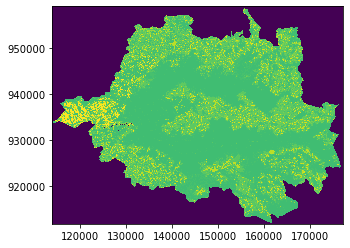

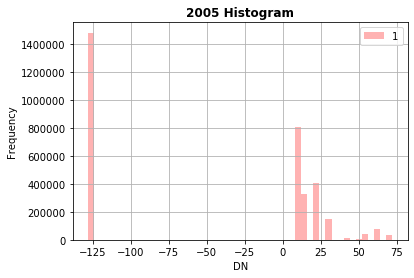

In [4]:
try:
    tif2005R = rasterio.open('LandUse/2005/2005_Final_Final.tif')
    show(tif2005R)
    show_hist(tif2005R, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="2005 Histogram")
except:
    print('File not found')

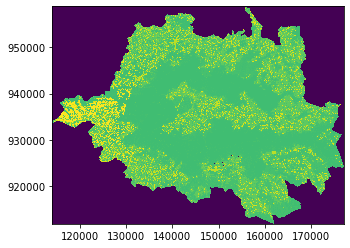

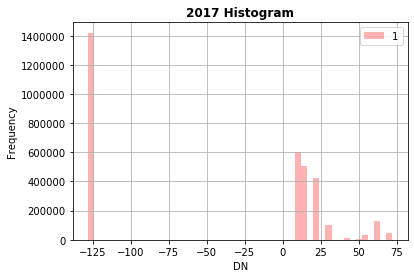

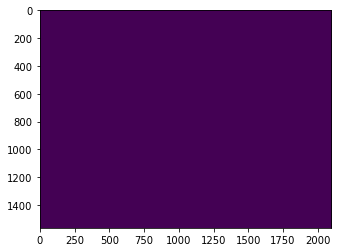

In [5]:
try:
    tif2017R = rasterio.open('LandUse/2017/2017_Final_Final.tif')
    show(tif2017R) # For georeferenced extents
    show_hist(tif2017R, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="2017 Histogram")
    show(tif2017R.read_masks())
except:
    print('File not found')

In [6]:
print('2017 Data projection: \n', tif2005R.read_crs())
print('2017 Data projection: \n', tif2017R.read_crs())

2017 Data projection: 
 EPSG:32637
2017 Data projection: 
 EPSG:32637


In [7]:
print('2005 Data\n Height: ', tif2005R.height, 'Width: ', tif2005R.width)
print('2017 Data\n Height: ', tif2017R.height, 'Width: ', tif2017R.width)

2005 Data
 Height:  1580 Width:  2114
2017 Data
 Height:  1564 Width:  2095


In [8]:
print('2005 Data bounds: \n', tif2005R.bounds)
print('2017 Data bounds: \n', tif2017R.bounds)

2005 Data bounds: 
 BoundingBox(left=113959.52737094305, bottom=911767.0641000578, right=177379.52737094305, top=959167.0641000578)
2017 Data bounds: 
 BoundingBox(left=114109.52737094305, bottom=911917.0641000578, right=176959.52737094305, top=958837.0641000578)


In [9]:
# 2005 data needs resampling

In [10]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

In [11]:
with rasterio.open('LandUse/2005/2005_Final_Final.tif') as src:
    transform, width, height = calculate_default_transform(
        tif2005R.read_crs(), tif2005R.read_crs(), tif2017R.width, tif2017R.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': tif2005R.read_crs(),
        'transform': transform,
        'width': width+1,
        'height': height-1
    })
    with rasterio.open('LandUse/2005_resampled.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=tif2005R.crs,
                resampling=Resampling.nearest)

In [12]:
try:
    tif2005R_resampled = rasterio.open('LandUse/2005_resampled.tif')
except:
    print('File not found')

In [13]:
print('2005 Data\n Height: ', tif2005R_resampled.height, 'Width: ', tif2005R_resampled.width)
print('2017 Data\n Height: ', tif2017R.height, 'Width: ', tif2017R.width)

2005 Data
 Height:  1564 Width:  2095
2017 Data
 Height:  1564 Width:  2095


In [14]:
print('2005 Resampled Data bounds: \n', tif2005R_resampled.bounds)
print('2017 Data bounds: \n', tif2017R.bounds)

2005 Resampled Data bounds: 
 BoundingBox(left=113959.52737094305, bottom=911802.035273243, right=177405.64974445774, top=959167.0641000578)
2017 Data bounds: 
 BoundingBox(left=114109.52737094305, bottom=911917.0641000578, right=176959.52737094305, top=958837.0641000578)


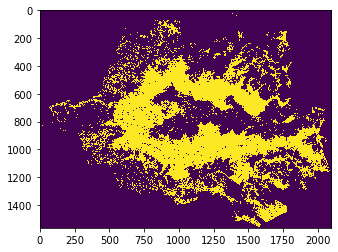

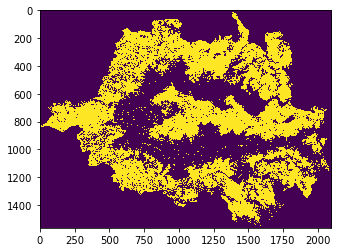

In [15]:
tif2005_core = (tif2005R_resampled.read() == 11)
show(tif2005_core)
tif2005_bufTrans = (tif2005R_resampled.read() > 11)
show(tif2005_bufTrans)

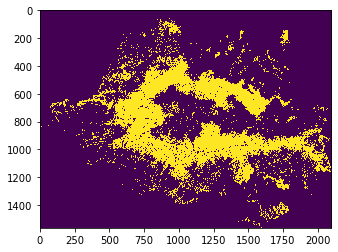

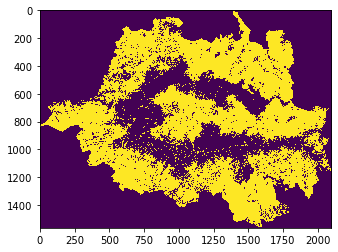

In [16]:
tif2017_core = (tif2017R.read() == 11)
show(tif2017_core)
tif2017_bufTrans = (tif2017R.read() > 11)
show(tif2017_bufTrans)

##### Changes in between the years

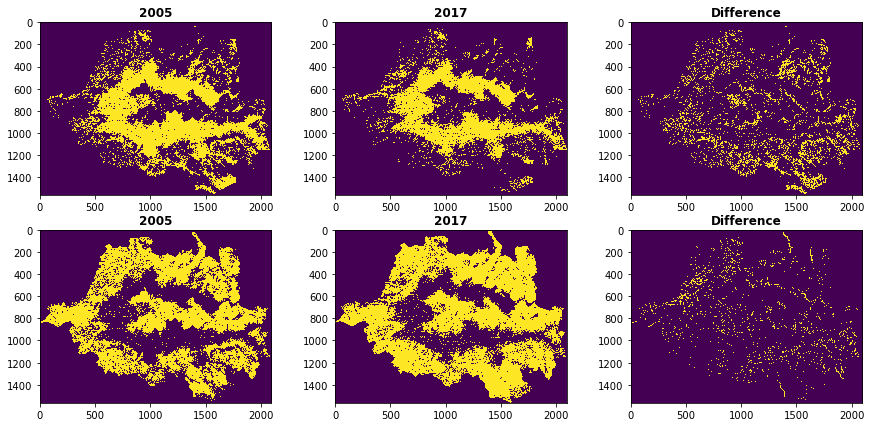

In [17]:
# Deforestation
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 7))
show((tif2005_core), ax = axes[0][0], title = "2005")
show(( tif2017_core), ax = axes[0][1], title = "2017")
show((tif2005_core & (~ tif2017_core)), ax=axes[0][2], title = "Difference");
show((tif2005_bufTrans), ax = axes[1][0], title = "2005")
show(( tif2017_bufTrans), ax = axes[1][1], title = "2017")
show((tif2005_bufTrans & (~ tif2017_bufTrans)), ax=axes[1][2], title = "Difference");

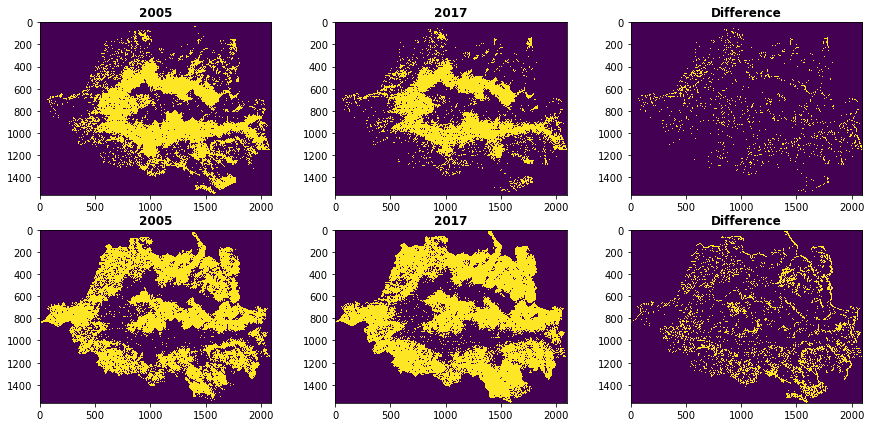

In [18]:
# Afforestation
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 7))
show((tif2005_core), ax = axes[0][0], title = "2005")
show(( tif2017_core), ax = axes[0][1], title = "2017")
show(((~tif2005_core) & tif2017_core), ax=axes[0][2], title = "Difference");
show((tif2005_bufTrans), ax = axes[1][0], title = "2005")
show(( tif2017_bufTrans), ax = axes[1][1], title = "2017")
show(((~tif2005_bufTrans) & tif2017_bufTrans), ax=axes[1][2], title = "Difference");

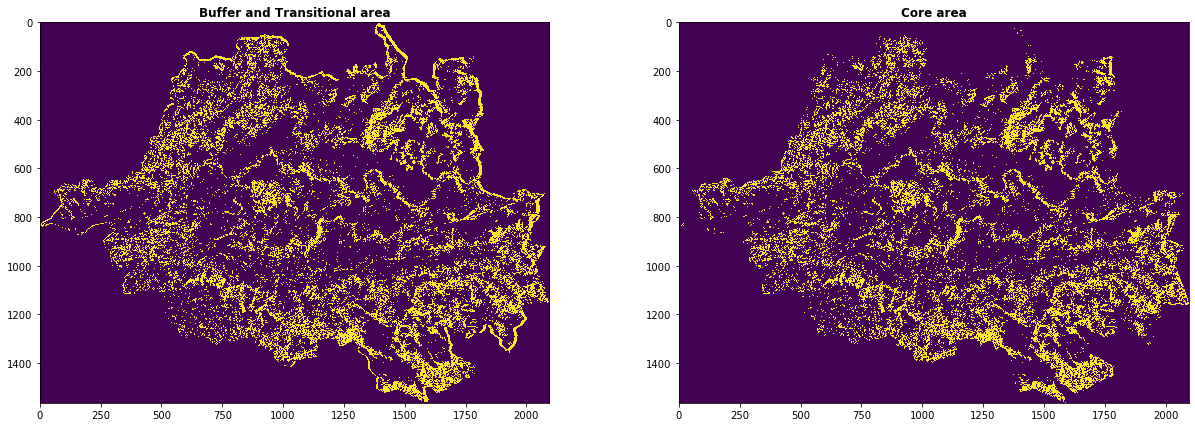

In [19]:
# No changes
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(21, 7))
show((tif2005_bufTrans ^ tif2017_bufTrans), ax = axes[0], title = "Buffer and Transitional area")
show((tif2005_core ^ tif2017_core), ax = axes[1], title = "Core area");